In [1]:
#Adiabatic Reactor

Text(0, 0.5, 'Temperature')

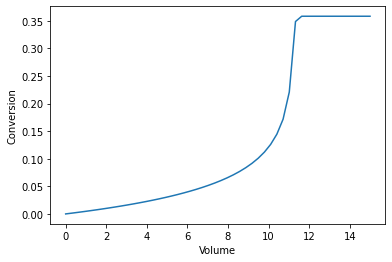

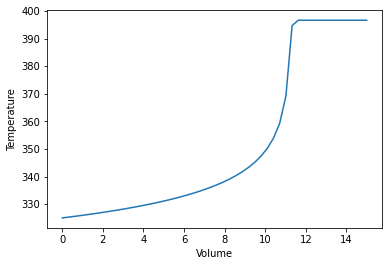

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#constants
cPA = 20 #cal/mol/K
cPB = 20 #cal/mol/K
cPC = 20 #cal/mol/K
cPcool = 18 #cal/mol/K
EA = 25000 #cal/mol
DeltaHR = -20000 #cal/mol
kref = 0.0002 #L^2/(kg*mol*s) at 300K
Tref1 = 300 #K
Ua = 320 #Cal/(s*m^3*K)
mc = 18 #mol/s
rhoB = 1400 #kg/m^3
KCref = 1000
Tref2 = 305 #K
FA0 = 5 #mol/s
FB0 = 2*FA0
FI = 2*FA0
CA0 = 0.2 #mol/L
v0 = (FA0 + FB0 + FI)/CA0
T0 = 325 #K
Ta0 = 300 #K
R = 1.986 #cal/mol/K
cPI = 20 #cal/mol/K

#Mass Bal
def ode(X,V):
    #Energy Balance (no external heat transfer)
    T = T0 + -DeltaHR*X/(cPA+(FB0*cPB/FA0)+(FI*cPI/FA0))
    
    cA = FA0 * (1-X)/v0*(T0/T)
    cB = FA0 * (((FB0/FA0)-X)/v0)*(T0/T)
    cC = (2* FA0 * X/v0) *(T0/T)
    
    KC = KCref*np.exp((-DeltaHR/R)*((1/T)-(1/Tref2)))
    k = kref * np.exp((-EA/R)*((1/T)-(1/Tref1)))
    
    rAprime = -k * (cA * cB -(cC**2/KC))
    
    rA = rAprime * rhoB
    
    dXdV = -rA/FA0
    
    
    return dXdV

Vspan = np.linspace(0,15)
init = 0

X = odeint(ode, init, Vspan)

plt.figure()
plt.plot(Vspan,X)
plt.xlabel('Volume')
plt.ylabel('Conversion')

plt.figure()
plt.plot(Vspan,T0 + (-DeltaHR*X/(cPA+(FB0*cPB/FA0)+(FI*cPI/FA0))))
plt.xlabel('Volume')
plt.ylabel('Temperature')

In [3]:
#Constant temperature cooling fluid

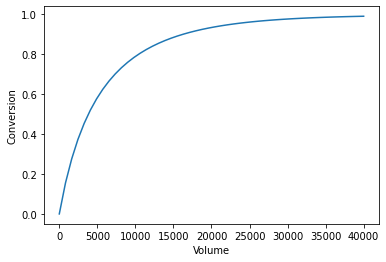

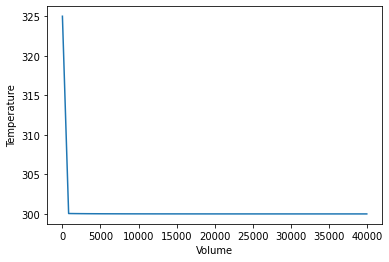

In [4]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#constants
cPA = 20 #cal/mol/K
cPB = 20 #cal/mol/K
cPC = 20 #cal/mol/K
cPI = 20 #cal/mol/K
cPcool = 18 #cal/mol/K
EA = 25000 #cal/mol
DeltaHR = -20000 #cal/mol
kref = 0.0002 #L^2/(kg*mol*s) at 300K
Tref1 = 300 #K
Ua = 320 #Cal/(s*m^3*K)
mc = 18 #mol/s
rhoB = 1400 #kg/m^3
KCref = 1000
Tref2 = 305 #K
FA0 = 5 #mol/s
FB0 = 2*FA0
FI = 2*FA0
CA0 = 0.2 #mol/L
v0 = (FA0 + FB0 + FI)/CA0
T0 = 325 #K
Ta0 = 300 #K
R = 1.986 #cal/mol/K

#Mass Bal
def ode(F, V):
    X = F[0]
    T = F[1]
    cA = FA0 * (1-X)/v0
    cB = FA0 * ((FB0/FA0)-X)/v0
    cC = 2* FA0 * X/v0

    
    KC = KCref*np.exp((-DeltaHR/R)*((1/T)-(1/Tref2)))
    k = kref * np.exp((-EA/R)*((1/T)-(1/Tref1)))
    
    rAprime = -k * (T0**2/T**2) * (cA * cB -(cC**2/KC))
    
    rA = rAprime * rhoB
    
    #Energy Balance (constant temperature cooling fluid)
    dTdV = ((rA * DeltaHR)-(Ua*(T-Ta0)))/((FA0*cPA)+(FB0*cPB)+(FI*cPI))
    dXdV = -rA/FA0
    
    dFdV = [dXdV,dTdV]
    
    return dFdV

Vspan = np.linspace(0,40000)
init = [0,T0]

F = odeint(ode, init, Vspan)

plt.figure()
plt.plot(Vspan,F[:,0])
plt.xlabel('Volume')
plt.ylabel('Conversion')
plt.show()
plt.figure()
plt.plot(Vspan,F[:,1])
plt.xlabel('Volume')
plt.ylabel('Temperature')
plt.show()

In [5]:
#Co-current heat exchanger

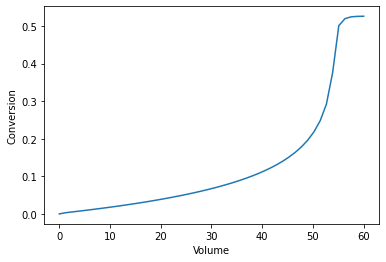

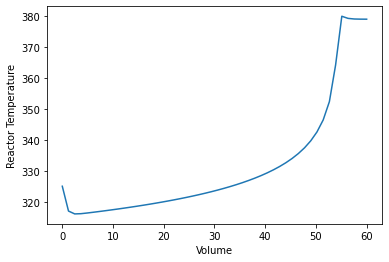

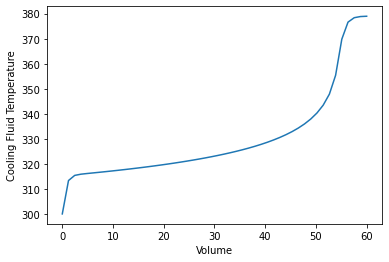

In [6]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#constants
cPA = 20 #cal/mol/K
cPB = 20 #cal/mol/K
cPC = 20 #cal/mol/K
cPcool = 18 #cal/mol/K
EA = 25000 #cal/mol
DeltaHR = -20000 #cal/mol
kref = 0.0002 #L^2/(kg*mol*s) at 300K
Tref1 = 300 #K
Ua = 320 #Cal/(s*m^3*K)
mc = 18 #mol/s
rhoB = 1400 #kg/m^3
KCref = 1000
Tref2 = 305 #K
FA0 = 5 #mol/s
FB0 = 2*FA0
FI = 2*FA0
CA0 = 0.2 #mol/L
v0 = (FA0 + FB0 + FI)/CA0
T0 = 325 #K
Ta0 = 300 #K
R = 1.986 #cal/mol/K

#Mass Bal
def ode(F, V):
    X = F[0]
    T = F[1]
    Ta = F[2]
    cA = FA0 * (1-X)/v0
    cB = FA0 * ((FB0/FA0)-X)/v0
    cC = 2* FA0 * X/v0

    
    KC = KCref*np.exp((-DeltaHR/R)*((1/T)-(1/Tref2)))
    k = kref * np.exp((-EA/R)*((1/T)-(1/Tref1)))
    
    rAprime = -k * (T0**2/T**2) * (cA * cB -(cC**2/KC))
    
    rA = rAprime * rhoB
    
    #Energy Balance (constant temperature cooling fluid)
    dTdV = ((rA * DeltaHR)-(Ua*(T-Ta)))/((FA0*cPA)+(FB0*cPB)+(FI*cPI))
    dTadV = Ua * (T-Ta)/(mc*cPcool)
    dXdV = -rA/FA0 
    
    dFdV = [dXdV,dTdV, dTadV]
    
    return dFdV
    
Vspan = np.linspace(0,60)
init = [0,T0,Ta0]

F = odeint(ode, init, Vspan)
plt.figure()
plt.plot(Vspan,F[:,0])
plt.xlabel('Volume')
plt.ylabel('Conversion')
plt.show()

plt.figure()
plt.plot(Vspan,F[:,1])
plt.xlabel('Volume')
plt.ylabel('Reactor Temperature')
plt.show()

plt.figure()
plt.plot(Vspan,F[:,2])
plt.xlabel('Volume')
plt.ylabel('Cooling Fluid Temperature')
plt.show()

In [7]:
#Counter-current heat exchanger

Temperature at 9 m^3 is 299.0 K
Conversion is 0.4615193691114094


<Figure size 432x288 with 0 Axes>

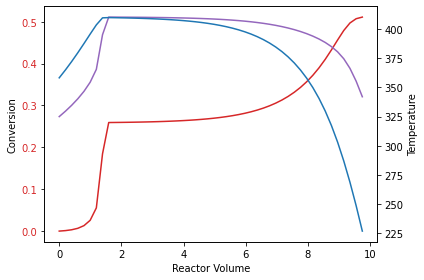

In [8]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#constants
cPA = 20 #cal/mol/K
cPB = 20 #cal/mol/K
cPC = 20 #cal/mol/K
cPI = 20 #cal/mol/K
cPcool = 18 #cal/mol/K
EA = 25000 #cal/mol
DeltaHR = -20000 #cal/mol
kref = 0.0002 #L^2/(kg*mol*s) at 300K
Tref1 = 300 #K
Ua = 320 #Cal/(s*m^3*K)
mc = 18 #mol/s
rhoB = 1400 #kg/m^3
KCref = 1000
Tref2 = 305 #K
FA0 = 5 #mol/s
FB0 = 2*FA0
FI = 2*FA0
CA0 = 0.2 #mol/L
v0 = (FA0 + FB0 + FI)/CA0
T0 = 325 #K
Ta0 = 300 #K
R = 1.986 #cal/mol/K

#Mass Bal
def ode(F, V):
    X = F[0]
    T = F[1]
    Ta = F[2]
    cA = FA0 * (1-X)/v0
    cB = FA0 * ((FB0/FA0)-X)/v0
    cC = 2* FA0 * X/v0

    
    KC = KCref*np.exp((-DeltaHR/R)*((1/T)-(1/Tref2)))
    k = kref * np.exp((-EA/R)*((1/T)-(1/Tref1)))
    
    rAprime = -k * (T0**2/T**2) * (cA * cB -(cC**2/KC))
    
    rA = rAprime * rhoB
    
    #Energy Balance (constant temperature cooling fluid)
    dTdV = ((rA * DeltaHR)-(Ua*(T-Ta)))/((FA0*cPA)+(FB0*cPB)+(FI*cPI))
    dTadV = -Ua * (T-Ta)/(mc*cPcool)
    dXdV = -rA/FA0 
    
    dFdV = [dXdV,dTdV, dTadV]
    
    return dFdV
    
Vspan = np.linspace(0,9.75)
init = [0,T0,358.2463]  #358.2463K is the optimal temperature

F = odeint(ode, init, Vspan)

from scipy.interpolate import interp1d
Xint = interp1d(Vspan, F[:,0])
Ta_int = interp1d(Vspan, F[:,2])

plt.figure()
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Reactor Volume')
ax1.set_ylabel('Conversion')
ax1.plot(Vspan, F[:,0], color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color2 = 'tab:purple'
color3 = 'tab:blue'
ax2.set_ylabel('Temperature')
ax2.plot(Vspan, F[:,1], color2)
ax2.plot(Vspan, F[:,2], color3)

fig.tight_layout()

print('Temperature at 9 m^3 is {0} K'.format(np.round(Ta_int(9))))
print('Conversion is {0}'.format(Xint(9)))

In [9]:
#Adiabatic reactor with pressure drop

Text(0, 0.5, 'Pressure')

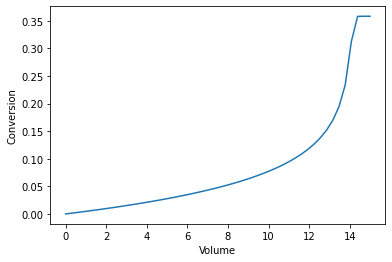

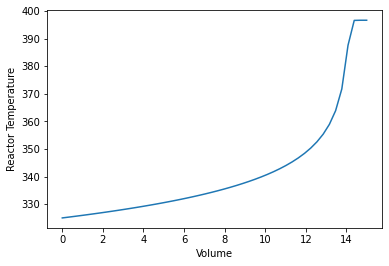

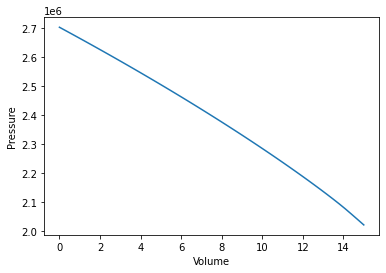

In [10]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#constants
cPA = 20 #cal/mol/K
cPB = 20 #cal/mol/K
cPC = 20 #cal/mol/K
cPI = 20 #cal/mol/K
cPcool = 18 #cal/mol/K
EA = 25000 #cal/mol
DeltaHR = -20000 #cal/mol
kref = 0.0002 #L^2/(kg*mol*s) at 300K
Tref1 = 300 #K
Ua = 320 #Cal/(s*m^3*K)
mc = 18 #mol/s
rhoB = 1400 #kg/m^3
KCref = 1000
Tref2 = 305 #K
FA0 = 5 #mol/s
FB0 = 2*FA0
FI = 2*FA0
CA0 = 0.2 #mol/L
v0 = (FA0 + FB0 + FI)/CA0
T0 = 325 #K
Ta0 = 300 #K
R = 1.986 #cal/mol/K
alpha = 0.00002
R2 = 8.314
P0 = R2 * T0 * 5 * CA0*1000

#Mass Bal
def ode(F,V):
    X = F[0]
    P = F[1]
    #Energy Balance (no external heat transfer)
    T = T0 + -DeltaHR*X/(cPA+(FB0*cPB/FA0)+(FI*cPI/FA0))
    
    cA = FA0 * (1-X)/v0*(T0/T)*(P/P0)
    cB = FA0 * (((FB0/FA0)-X)/v0)*(T0/T)*(P/P0)
    cC = (2* FA0 * X/v0) *(T0/T)*(P/P0)
    
    KC = KCref*np.exp((-DeltaHR/R)*((1/T)-(1/Tref2)))
    k = kref * np.exp((-EA/R)*((1/T)-(1/Tref1)))
    
    rAprime = -k * (cA * cB -(cC**2/KC))
    
    rA = rAprime * rhoB
    
    dXdV = -rA/FA0
    dPdV = -0.5* alpha* rhoB* (T/T0) * ( P0**2 /P)
    
    dFdV = [dXdV,dPdV]
    return dFdV

Vspan = np.linspace(0,15)
init = [0,P0]

F = odeint(ode, init, Vspan)

plt.figure()
plt.plot(Vspan, F[:,0])
plt.xlabel('Volume')
plt.ylabel('Conversion')

plt.figure()
plt.plot(Vspan, T0 + (-DeltaHR*F[:,0]/(cPA+(FB0*cPB/FA0)+(FI*cPI/FA0))))
plt.xlabel('Volume')
plt.ylabel('Reactor Temperature')

plt.figure()
plt.plot(Vspan, F[:,1])
plt.xlabel('Volume')
plt.ylabel('Pressure')